# 说明

- 到目前为止，使用Torch实际上是可以实现基本上所有的机器学习与神经网络（包括深度神经网络）的算法模型。神经网络的模型核心是：
    1. 预测输出模型；
        - 函数表达；
    2. 梯度计算模型；
        - 函数的导数表达
            - 某些运算的导数在Torch中提供内置的实现（一般的运算的导数都是采用默认的内置实现：原理就是无穷小量下的近似极限）
            - 为了速度某些时候，需要自己使用Function接口中的backward函数重载实现（自定义导数函数，通过导数函数实现导数计算）
    3. 梯度循环迭代；
        - 计算梯度；
        - 更新梯度；

# 多层全链接神经网络的实现

## 思路

- 下面利用Torch的最基本的封装来实现一个全链接神经网络，对鸢尾花进行分类。构建的神经网络结构为：
    - 4 -> 12 -> 6  -> 3
        - 两个隐藏层；
        - 多分类：三类鸢尾花
    - 实现思路：
        - 预测模型：
            - 采用默认求导实现
            - 激活函数采用sigmoid（可以选择其他）
        - 损失模型：
            - 采用交叉熵损失函数（可以选择其他）

## 实现代码

In [1]:
import torch
import sklearn.datasets
from sklearn.model_selection import train_test_split

# 1. 准备数据 --------------------
data, target = sklearn.datasets.load_iris(return_X_y=True)
# data, _, target, _ = train_test_split(data, target, test_size=0.01, random_state=42)

x = torch.Tensor(data)     # 全部150个样本，一共三类
y = torch.tensor(target)    # 使用交叉熵需要LongTensor
# 2. 准备预测模型 ----------------
w1 = torch.randn(12, 4)    # 前面输出特征，后面输入特征
b1 =  torch.randn(12)       # 输出特征
w1.requires_grad=True
b1.requires_grad=True

w2 = torch.randn(6, 12)    # 前面输出特征，后面输入特征
b2 =  torch.randn(6)       # 输出特征
w2.requires_grad=True
b2.requires_grad=True

w3 = torch.randn(3, 6)    # 前面输出特征，后面输入特征
b3 =  torch.randn(3)       # 输出特征
w3.requires_grad=True
b3.requires_grad=True

# #########################
def forward(input):
        o1 = torch.nn.functional.linear(input, w1, b1)
#         y1 = torch.sigmoid(o1)     # torch.nn.functional.sigmoid已经不推荐使用
        y1 = torch.nn.functional.relu(o1) 
        x1 = y1
        # ----
        o2= torch.nn.functional.linear(x1, w2, b2)
#         y2 = torch.sigmoid(o2)
        y2 = torch.nn.functional.relu(o2) 
        x2 = y2
        # ----
        o3= torch.nn.functional.linear(x2, w3, b3)
#         y3 = torch.sigmoid(o3)
        return o3

# 迭代轮数
epoch = 20000
# 学习率
learn_rate = 0.01
for n in range(epoch):
    # 计算梯度
    y_= forward(x)
    loss = torch.nn.functional.cross_entropy(y_, y)
    #    3.2 损失优化
    loss.backward(retain_graph=True)
    with torch.autograd.no_grad():
        # 更新梯度
        w1 -= learn_rate * w1.grad
        b1 -= learn_rate * b1.grad

        w2 -= learn_rate * w2.grad
        b2 -= learn_rate * b2.grad

        w3 -= learn_rate * w3.grad
        b3 -= learn_rate * b3.grad
        # 清空上一轮的梯度
        w1.grad.zero_()
        b1.grad.zero_()
        w2.grad.zero_()
        b2.grad.zero_()
        w3.grad.zero_()
        b3.grad.zero_()
    if n % 1000 == 0:
        print(F"损失值：{loss.detach().numpy():8.6f}, ", end="")
        y_ = forward(x)
        y_ = y_.log_softmax(dim=1)    # 有使用交叉熵，其中做了一个log_softmax运算，所以这儿也作为概率使用，并调用了log_softmax运算
        predict = y_.argmax(dim=1)
        print(F"\t训练集测试准确度：{(predict == y).float().mean()*100:8.2f}%")

# # 4. 测试与评估------------------
# y_ = forward(x)
# y_ = y_.log_softmax(dim=1)    # 有使用交叉熵，其中做了一个log_softmax运算，所以这儿也作为概率使用，并调用了log_softmax运算
# predict = y_.argmax(dim=1)
# print(predict)
# print((predict == y).float().mean())

损失值：24.356802, 	训练集测试准确度：   33.33%
损失值：0.114688, 	训练集测试准确度：   96.67%
损失值：0.065713, 	训练集测试准确度：   97.33%
损失值：0.056335, 	训练集测试准确度：   98.00%
损失值：0.051487, 	训练集测试准确度：   98.67%
损失值：0.048233, 	训练集测试准确度：   99.33%
损失值：0.045789, 	训练集测试准确度：   99.33%
损失值：0.043852, 	训练集测试准确度：   99.33%
损失值：0.042273, 	训练集测试准确度：   98.67%
损失值：0.040961, 	训练集测试准确度：   98.67%
损失值：0.039847, 	训练集测试准确度：   98.67%
损失值：0.038890, 	训练集测试准确度：   98.67%
损失值：0.038064, 	训练集测试准确度：   98.67%
损失值：0.037350, 	训练集测试准确度：   98.67%
损失值：0.036727, 	训练集测试准确度：   98.67%
损失值：0.036185, 	训练集测试准确度：   98.67%
损失值：0.035697, 	训练集测试准确度：   98.67%
损失值：0.035270, 	训练集测试准确度：   98.67%
损失值：0.034884, 	训练集测试准确度：   98.67%
损失值：0.034534, 	训练集测试准确度：   98.67%


## 说明

- 通过自动求导，实际上神经网络的实现变得很easy！但是这种重复与反复的工作本身是比较繁琐，Torch实际提供更好结构设计来实现。
    - Model（容器）
        - Layer（操作）
            - 运算（函数表达式与内置求导）
                - 函数Function : 定制求导(`[forward]`与求导`[backward]`)

- 这种结构从最底层到应用封装，基本上可以班组各种层次的需求。

- 问题：
    - 实际损失函数中的操作需要非常清楚，实际每个损失函数的操作在文档中都有描述。
    - 正如我们上面中log_softmax运算一样。

# 卷积神经网络LeNet-5实现

- 实现LeNet-5卷积神经网络，并实现手写数字识别。
    - 数据集采用手写数字数据集。

## LeNet-5网络模型回顾

- 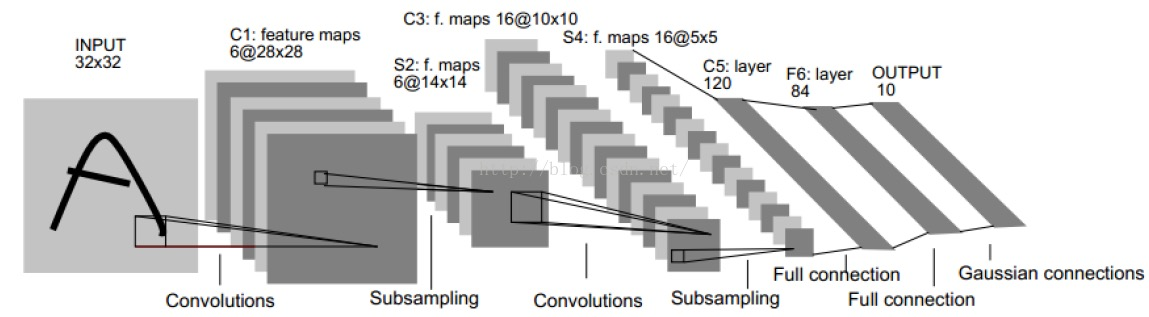

- 输入图像：INPUT：`N*32*32*1`
    - N是图像数量
    - 1是图像深度
    - `32*32`是图像高宽（有的数据集图像高宽是`28*28`,这个可以在卷积运算的时候，指定Padding即可）
- 池化层：C1：`6@28*28` -> `6@14*14`
    - 采用`2*2`的最大池化可以降维一半。
- 从卷积层（图像特征学习层）到全连接层（分类层）：C5: `120@1*1`
    - 这一层在上图中表示不清楚，需要特别注意，因为这儿有一个数据格式转换的问题（在Torch中就是view的问题）

## 实现思路

- 首先确定训练参数；
- 实现预测模型；
- 实现损失模型；
- 损失优化迭代训练；

## LeNet-5模型手工实现代码

### MINIST数据集加载

- 数据集稳健已经放在本文档所在目录下的datasets目录中：
    - 训练集：
        - train-images.idx3-ubyte
        - train-labels.idx1-ubyte
    - 测试集：
        - t10k-images.idx3-ubyte
        - t10k-labels.idx1-ubyte
- 数据使用二进制保存，具体的格式在官网参考：
    - http://yann.lecun.com/exdb/mnist/
    - 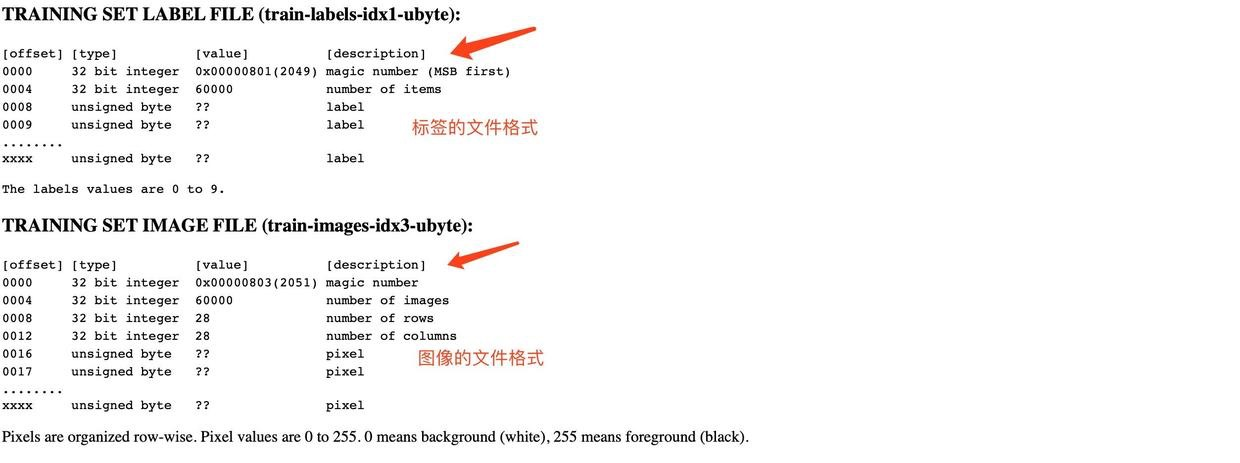
    - 其他图片格式的数据也有，个人根据需要选择，这里选择二进制的数据集，读取速度快。

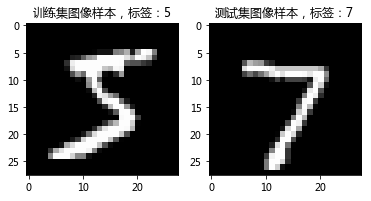

In [2]:
%matplotlib inline
import struct
import matplotlib.pyplot as plt
import numpy as np

# 读取图片
def load_image_fromfile(filename):
    with open(filename, 'br') as fd:
        # 读取图像的信息
        header_buf = fd.read(16)   # 16字节，4个int整数
        # 按照字节解析头信息（具体参考python SL的struct帮助）
        magic_, nums_, width_, height_ = struct.unpack('>iiii', header_buf)  # 解析成四个整数：>表示大端字节序，i表示4字节整数
        # 保存成ndarray对象
        imgs_ = np.fromfile(fd, dtype=np.uint8)
        imgs_ = imgs_.reshape(nums_, height_, width_)
    return imgs_

# 读取标签
def load_label_fromfile(filename):
    with open(filename, 'br') as fd:
        header_buf = fd.read(8) 
        magic, nums = struct.unpack('>ii' ,header_buf) 
        labels_ = np.fromfile(fd, np.uint8) 
    return labels_

# 读取训练集
train_x = load_image_fromfile("datasets/train-images.idx3-ubyte")
train_y = load_label_fromfile("datasets/train-labels.idx1-ubyte")
train_x = train_x.astype(np.float64)
train_y = train_y.astype(np.int64)
# 读取测试集
test_x = load_image_fromfile("datasets/t10k-images.idx3-ubyte")
test_y = load_label_fromfile("datasets/t10k-labels.idx1-ubyte")

# 可视化验证读取的数据
ax1 = plt.subplot(121, title=F"训练集图像样本，标签：{train_y[0]}")
ax1.imshow(train_x[0], cmap="gray")
ax2 = plt.subplot(122, title=F"测试集图像样本，标签：{test_y[0]}")
ax2.imshow(test_x[0], cmap="gray")

plt.show()

- 提示：
    - 图像是`28*28`大小的图像，在第一层卷积处理的时候，需要padding=True。这样在第二层图像参数可以保持一致。

### 网络模型

- 网络模型包含两个方面：
    1. 预测模型
    2. 损失模型（优化模型）

- 损失模型选择：交叉熵
    - 分类采用逻辑分布应该是不错的选择；
    - 交叉熵有两个封装函数，我们选择nll_loss函数，原因是概率转换不一定选择log_softmax：
        - cross_entropy：使用log_softmax作为输出的概率转换
        - nll_loss：无

In [3]:
# 数据由上一个Code Cell完成
import torch
import math

# 1. 定义训练参数（3层卷积，2层全链接）
#   1.1. 1 @28 * 28 ->   6@28 * 28:  6@5*5 的卷积核  -> 6 @ 14 * 14(池化)
#   1.2. 6@14 * 14 ->   16@10 * 10:  16@5*5 的卷积核  -> 10 @ 5 * 5(池化)
#   1.3. 16@5 * 5 ->   120@1 * 1:  120@5*5 的卷积核  （没有池化）
#   1.4. 120 * 84  
#   1.5. 84 * 10   (输出10个特征，分类0-9十个数字)
# 1.1
w_6_5_5 = torch.Tensor(6, 1, 5, 5)   #（C_out, C_in, H_k, W_k）
b_6_5_5 = torch.Tensor(6)               # (C_out)   # 卷积核也可以不使用偏置项的
# 初始化（模仿Torch的源代码，自己采用正态分布，每次计算都是无穷大）
stdv = 1.0 / math.sqrt(1 * 5 * 5)
w_6_5_5.data.uniform_(-stdv, stdv)
b_6_5_5.data.uniform_(-stdv, stdv)
# print(w_6_5_5)

# 1.2 
w_16_5_5 = torch.Tensor(16, 6, 5, 5)
b_16_5_5 = torch.Tensor(16)
# 初始化
stdv = 1.0 / math.sqrt(6 * 5 * 5)
w_16_5_5.data.uniform_(-stdv, stdv)
b_16_5_5.data.uniform_(-stdv, stdv)

# 1.3 
w_120_5_5 = torch.Tensor(120, 16, 5, 5)
b_120_5_5 = torch.Tensor(120) 
# 初始化
stdv = 1.0 / math.sqrt(16 * 5 * 5)
w_120_5_5.data.uniform_(-stdv, stdv)
b_120_5_5.data.uniform_(-stdv, stdv)

# 1.4
w_120_84 = torch.Tensor(84, 120) 
b_120_84 = torch.Tensor(84) 
# 初始化
stdv = 1.0 / math.sqrt(120)   # 使用输入的特征数作为均匀分布的计算基数
w_120_84.data.uniform_(-stdv, stdv)
b_120_84.data.uniform_(-stdv, stdv)

# 1.5
w_84_10 =torch.Tensor(10, 84) 
b_84_10 = torch.Tensor(10)
# 初始化
stdv = 1.0 / math.sqrt(84)
w_84_10.data.uniform_(-stdv, stdv)
b_84_10.data.uniform_(-stdv, stdv)


# print(w_16_5_5)
w_6_5_5.requires_grad = True
b_6_5_5.requires_grad = True
# 1.2 
w_16_5_5.requires_grad = True
b_16_5_5.requires_grad = True
# 1.3 
w_120_5_5.requires_grad = True
b_120_5_5.requires_grad = True
# 1.4
w_120_84.requires_grad = True
b_120_84.requires_grad = True
# 1.5
w_84_10.requires_grad = True
b_84_10.requires_grad = True

# 2. 定义forward模型(为了反复调用，封装成函数)
@torch.enable_grad()
def lenet5_forward(input):
    """
    input的格式：4-D（N, 1, 28, 28）：N表示每批次的样本数量
    out的格式：与input相同4-D（N, 10）：N表示每批次的样本数量
    """
    # 1.1 
    o_c1 = torch.nn.functional.conv2d(input=input, weight=w_6_5_5, bias=b_6_5_5, padding = 2)  # 原始图像28*28
    o_a1 = torch.nn.functional.relu(o_c1)
    o_p1 = torch.nn.functional.max_pool2d(input= o_a1, kernel_size=(2,2))
    o1 = o_p1
    # 1.2
    o_c2 = torch.nn.functional.conv2d(input=o1, weight=w_16_5_5, bias=b_16_5_5)
    o_a2 = torch.nn.functional.relu(o_c2)
    o_p2 = torch.nn.functional.max_pool2d(input= o_a2, kernel_size=(2,2))
    o2 = o_p2
    # 1.3
    o_c3 = torch.nn.functional.conv2d(input=o2, weight=w_120_5_5, bias=b_120_5_5)
    o_a3 = torch.nn.functional.relu(o_c3)
    # 无池化
    # o3 = o_a3.squeeze()    # 格式转换(把最后的1*1直接降维掉），转换为60000 * 120
    o3 = o_a3.view(o_a3.shape[0], o_a3.shape[1])
    # 1.4
    o_c4 = torch.nn.functional.linear(o3, w_120_84, b_120_84)
    o_a4 = torch.nn.functional.relu(o_c4)
    o4 = o_a4
    # 1.5
    o_c5 = torch.nn.functional.linear(o4, w_84_10, b_84_10)
    o_a5 = torch.log_softmax(o_c5, dim=1)
    o5 = o_a5
    return  o5 

# 3. 定义损失模型（封装成函数）
@torch.enable_grad()
def loss_model(out, target):
    loss_ = torch.nn.functional.cross_entropy(out, target)
    return loss_


# # 测试代码
# x = torch.Tensor(train_x).view(train_x.shape[0], 1, train_x.shape[1], train_x.shape[2])   # N,C,W,H
# y = torch.LongTensor(train_y)

# y_ = lenet5_forward(x)

# loss = loss_model(y_, y)
# print(loss)

### 迭代训练

- 由于训练样本60000个，所以训练采用随机梯度下降的方式，每次训练采用一部分样本，按照批次训练。

In [4]:
import torch

# 为了速度取1000个样本训练
# train_x = train_x[0:10]
# train_y = train_y[0:10]
# 训练集
x = torch.Tensor(train_x).view(train_x.shape[0], 1, train_x.shape[1], train_x.shape[2])   # N,C,W,H
y = torch.LongTensor(train_y)
# # 测试集
t_x =  torch.Tensor(test_x).view(test_x.shape[0], 1, test_x.shape[1], test_x.shape[2])   # N,C,W,H
t_y =  torch.LongTensor(test_y)

# 训练超参数
# 学习率
learn_rate = 0.001
# 训练轮数
epoch = 500
# 没批样本数
batch_size = 2000
# 批次计算
batch_num = len(train_y) // batch_size

# 轮次循环
for e in range(epoch):
    # 批次循环
    for idx in range(batch_num):
        # 批次样本
        start = idx *batch_size
        end = (idx + 1) * batch_size
        b_x = x[start: end]
        b_y = y[start: end]
        # 计算输出
        b_y_ = lenet5_forward(b_x)
#         break
        # 计算损失
        l_ = loss_model(b_y_, b_y)
        # 计算梯度
        l_.backward(retain_graph=True)
#         print(w_6_5_5.grad)
        # 梯度更新(使用上下文管理器，进制对运算实现图跟踪)
        with torch.autograd.no_grad():
            w_6_5_5 -= learn_rate * w_6_5_5.grad
            b_6_5_5 -= learn_rate * b_6_5_5.grad

            w_16_5_5 -= learn_rate * w_16_5_5.grad
            b_16_5_5 -= learn_rate * b_16_5_5.grad

            w_120_5_5 -= learn_rate * w_120_5_5.grad
            b_120_5_5 -= learn_rate * b_120_5_5.grad

            w_120_84 -= learn_rate * w_120_84.grad
            b_120_84 -= learn_rate * b_120_84.grad
            
            w_84_10 -= learn_rate * w_84_10.grad
            b_84_10 -= learn_rate * b_84_10.grad
            
            # 复原梯度
            w_6_5_5.grad.zero_()
            b_6_5_5.grad.zero_()
            
            w_16_5_5.grad.zero_()
            b_16_5_5.grad.zero_()
            
            w_120_5_5.grad.zero_()
            b_120_5_5.grad.zero_()
            
            w_120_84.grad.zero_()
            b_120_84.grad.zero_()
            
            w_84_10.grad.zero_()
            b_84_10.grad.zero_()
            
    # 每一轮次完毕，输出损失度与测试集准确率
    if e % 100 ==0:
        print(F"第{e:03d}轮")
        print(F"\t损失值：{l_:8.6f}",end="")  
        # 测试集测试
        with torch.autograd.no_grad():   
            predict = lenet5_forward(t_x)
            # 计算准确率
            y_ = predict.argmax(dim=1)
            correct_rate = (y_ == t_y).float().mean()
            print(F"\t测试集准确率：{correct_rate*100: 6.2f}%")
print("------训练完毕------") 

第000轮
	损失值：1.785437	测试集准确率： 41.43%
第100轮
	损失值：0.064623	测试集准确率： 97.25%
第200轮
	损失值：0.047923	测试集准确率： 98.04%
第300轮
	损失值：0.039753	测试集准确率： 98.31%
第400轮
	损失值：0.034219	测试集准确率： 98.48%
------训练完毕------


## LetNet-5模型框架实现代码

- 技术点提示：
    1. 数据集切分管理；
    2. 决策模型
        - 分成计算
    3. 损失模型与优化模型
    4. 训练过程

### 数据集加载与处理

In [5]:
# 与手工实现版本一样，加载MINST数据集
%matplotlib inline
import struct
import matplotlib.pyplot as plt
import numpy as np
import torch.utils.data 
# 读取图片
def load_image_fromfile(filename):
    with open(filename, 'br') as fd:
        # 读取图像的信息
        header_buf = fd.read(16)   # 16字节，4个int整数
        # 按照字节解析头信息（具体参考python SL的struct帮助）
        magic_, nums_, width_, height_ = struct.unpack('>iiii', header_buf)  # 解析成四个整数：>表示大端字节序，i表示4字节整数
        # 保存成ndarray对象
        imgs_ = np.fromfile(fd, dtype=np.uint8)
        imgs_ = imgs_.reshape(nums_, height_, width_)
    return imgs_

# 读取标签
def load_label_fromfile(filename):
    with open(filename, 'br') as fd:
        header_buf = fd.read(8) 
        magic, nums = struct.unpack('>ii' ,header_buf) 
        labels_ = np.fromfile(fd, np.uint8) 
    return labels_

# 读取训练集
train_x = load_image_fromfile("datasets/train-images.idx3-ubyte")
train_y = load_label_fromfile("datasets/train-labels.idx1-ubyte")
train_x = train_x.astype(np.float64)
train_y = train_y.astype(np.int64)
# 读取测试集
test_x = load_image_fromfile("datasets/t10k-images.idx3-ubyte")
test_y = load_label_fromfile("datasets/t10k-labels.idx1-ubyte")

# 使用Torch的数据集管理工具管理
# 转换为Tensor
x = torch.Tensor(train_x).view(train_x.shape[0], 1, train_x.shape[1], train_x.shape[2])   # N,C,W,H
y = torch.LongTensor(train_y)

t_x =  torch.Tensor(test_x).view(test_x.shape[0], 1, test_x.shape[1], test_x.shape[2])   # N,C,W,H
t_y =  torch.LongTensor(test_y)

# 使用TensorDataSet封装数据与标签
train_dataset = torch.utils.data.TensorDataset(x, y)
test_dataset = torch.utils.data.TensorDataset(t_x, t_y)

# 数据随机与切分器
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, shuffle=True, batch_size=2000)   # 批次数量1000
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, shuffle=True, batch_size=10000)  # 一个批次直接预测


### 定义神经网络模型

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

class LeNet_5(torch.nn.Module):
    def __init__(self):
        super(LeNet_5, self).__init__()
        # 卷积层1 :1 @ 28 * 28 - > 6 @ 28 * 28 -> 6 @ 14 * 14 
        # 卷积层2 :6 @ 14 * 14  -> 16 @ 10 * 10 -> 16 @ 5 * 5
        # 卷积层3 :16 @ 5 * 5 -> 120 @ 1 * 1
        self.layer_1 = torch.nn.Conv2d(in_channels=1, out_channels=6, kernel_size=(5, 5), padding=2) 
        self.layer_2 = torch.nn.Conv2d(in_channels=6, out_channels=16, kernel_size=(5, 5), padding=0)
        self.layer_3 = torch.nn.Conv2d(in_channels=16, out_channels=120, kernel_size=(5, 5), padding=0)
        # 连接层1 : 120 -> 84
        # 链接层2 : 84 -> 10
        self.layer_4 = torch.nn.Linear(120, 84)
        self.layer_5 = torch.nn.Linear(84, 10)
        
        
    def forward(self, input):
        # 预测模型实现
        # 卷积层
        t = self.layer_1(input)        
        t = torch.nn.functional.relu(t)
        t = torch.nn.functional.max_pool2d(t, kernel_size=(2, 2))
        
        t = self.layer_2(t)
        t = torch.nn.functional.relu(t)
        t = torch.nn.functional.max_pool2d(t, kernel_size=(2, 2))
        
        t = self.layer_3(t)
        t = torch.nn.functional.relu(t)
        
        t = t.squeeze()    # 长度为1的维数直接降维
        # 链接层
        t = self.layer_4(t)
        t= torch.nn.functional.relu(t)
        
        t = self.layer_5(t)
        t = torch.nn.functional.log_softmax(t, dim=1)
        return t
    
    

### 训练实现

- 包含损失模型与优化模型


In [7]:
# 模型
model = LeNet_5()
parameters = model.parameters()
# 巡视函数
criterion = torch.nn.CrossEntropyLoss()
# 优化器
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # 学习率

# 训练参数
epoch = 500
for e in range(epoch):
    # 批次处理
    for data, target in train_loader:
        # 清空梯度
        optimizer.zero_grad()    
        # 计算输出
        out = model(data)
        # 计算损失
        loss  = criterion(out, target)
        # 计算梯度
        loss.backward()
        # 更新梯度
        optimizer.step()
    # 一轮结束，可以使用测试集测试准确率
    if e % 100 == 0:
        with torch.no_grad():   # 关闭梯度计算跟踪
            for data, target in test_loader:
                y_ = model(data)
                predict = torch.argmax(y_, dim=1)
                correct_rate = (predict == target).float().mean()
                print(F"\t损失度：{loss:8.6f},\t准确率：{correct_rate * 100: 5.2f}%")


	损失度：0.320754,	准确率： 91.86%
	损失度：0.000031,	准确率： 98.89%
	损失度：0.000005,	准确率： 98.87%
	损失度：0.000001,	准确率： 98.87%
	损失度：0.000000,	准确率： 98.86%


# Torch框架核心结构

- 以上面任务为主线，基本上可以把Torch封装的核心结构搭建起来，下面使用一个图可以描述：
    - 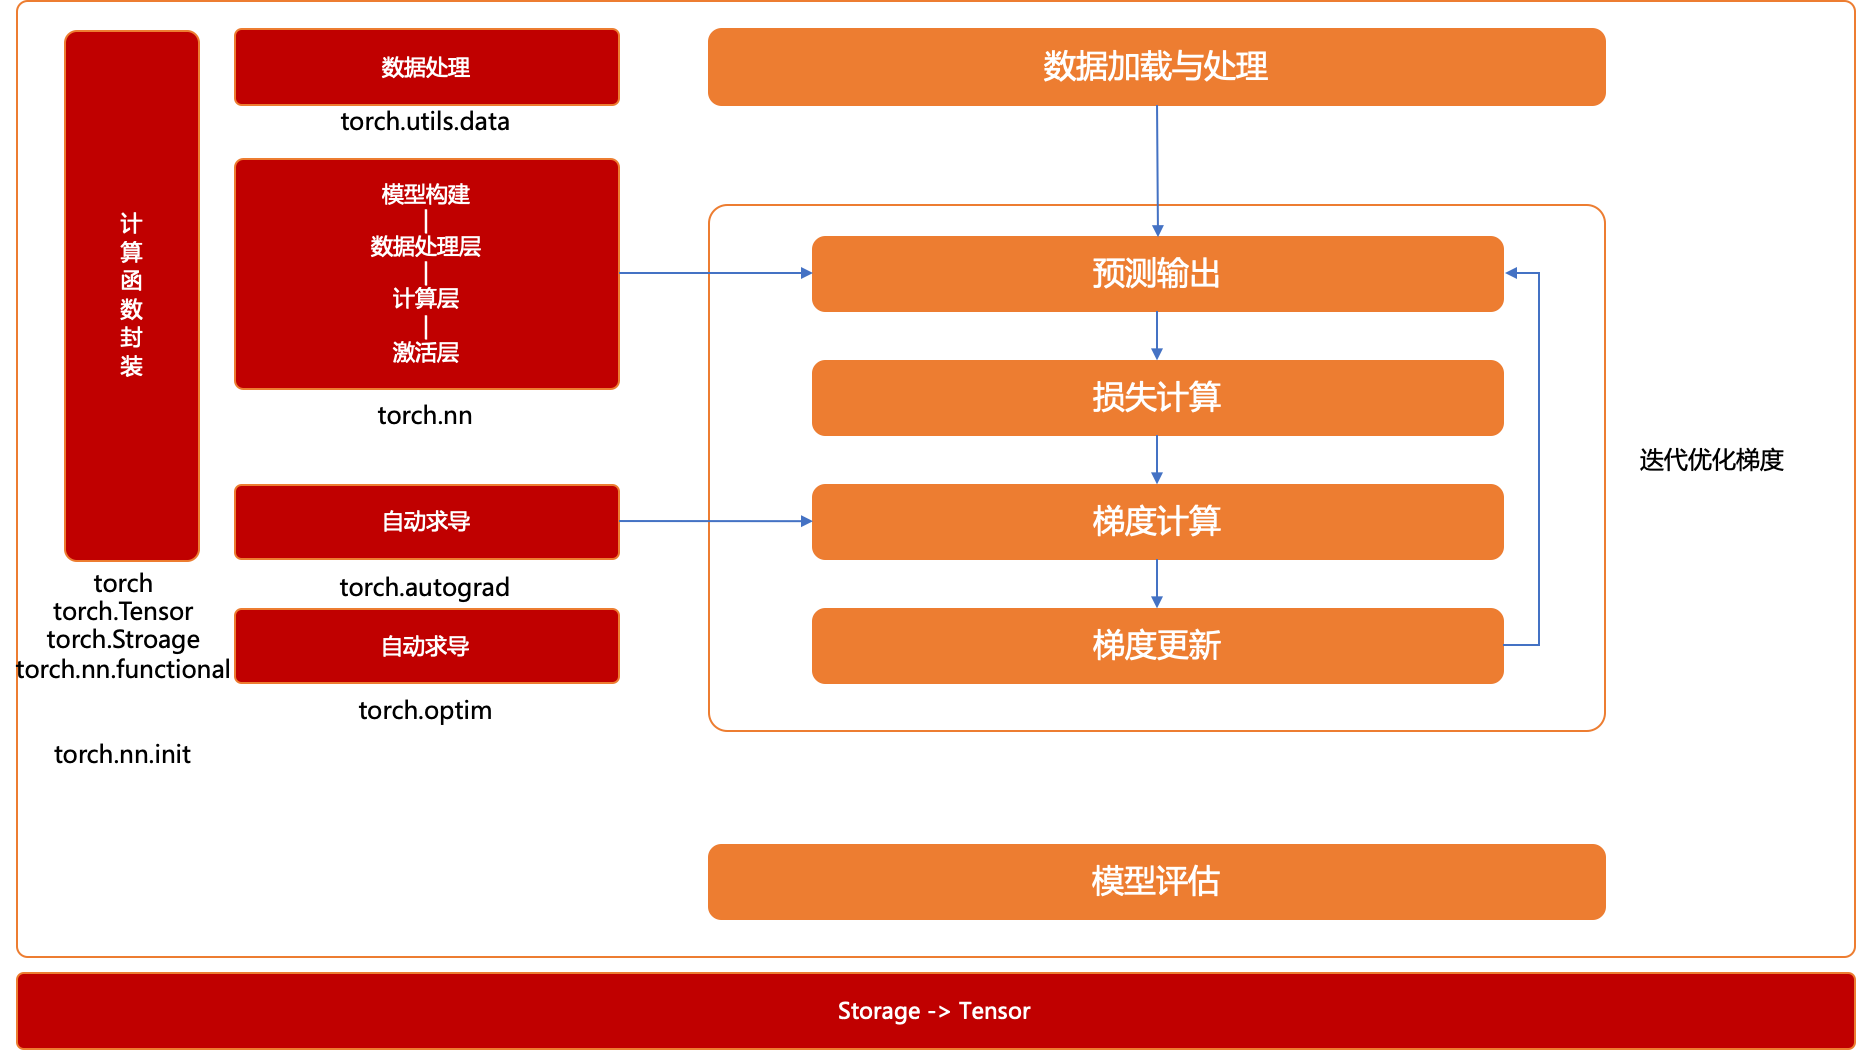

## 核心模块说明

### 基本模块

- 基本模块主要是Tensor，提供通用的数据结构管理，类型管理，数据存储管理，数据的通用数学运算函数封装等。
    1. torch
        - 主要提供快捷的函数调用与访问，包含torch.Tensor中的全局函数以及后面；
    2. torch.Tensor
        - 数据结构管理（数据get/set管理），数据视图管理，数据运算管理
    3. torch.Stroage
        - 数据存储管理
    4. torch.finfo与torch.iinfo
        - 数据类型管理

### 机器学习与深度学习运算模块

- 这个模块封装了机器学习与深度学习的常见函数运算
- torch.nn.functional
    1. 线性运算
    2. 激活函数
        - 非线性函数
    3. 卷积运算
    4. 池化运算
    5. 距离运算
    6. 损失函数
    7. 标准化函数
         - normalize与batchnorm函数（数据标准化）
    8. dropout函数
    9. 系数处理函数
        - 单热函数
        - 词袋处理函数

### 自动求导模块

- 这个模块两个核心函数与上下文管理：
    1. 这个模块核心两个求导函数（本质都一样）
        - backward
        - grad

    2. 上下文管理（动态图的上下文管理）：
        - enable_grad
        - no_grad
        - set_grad_enabled(mode)：上面两个功能的集成封装，与上面两个作用重复。

### 前向传播深度学习模块

- 这个模块基本上是提升效率使用的封装，前面的实现基本上能实现完成所有的机器学习与深度学习（特长主要还是在依赖梯度的深度学习算法上）
    - 决策模型容器封装
        - Module
        - Sequential
    - 决策模型的运算封装
        - Layer
            - 各种Layer，是整个深度学习中最重要的部分
    - 训练参数封装
        - Parameters
    - 其他运算的封装
        - Function
        - torch.optim
        - torch.nn.init（训练参数初始化）
            


### 数据集管理模块

- 数据集管理，包含数据切分，随机洗牌，交叉验证等功能；
    - torch.utils.data
        1. DataLoader
        2. Dataset
            - 各种快捷方便的数据管理集类（Subset、ConcatDataset，TensorDataset，ChainDataset等）

### 样本数据集模块

- 获取训练数据集，这个模块在torchvision中，常见数据集都包含：
    - MINST手写数据集
    - CIFAR

- 可以参考官网的参考文档：
    - `https://pytorch.org/docs/stable/torchvision/index.html`
    - 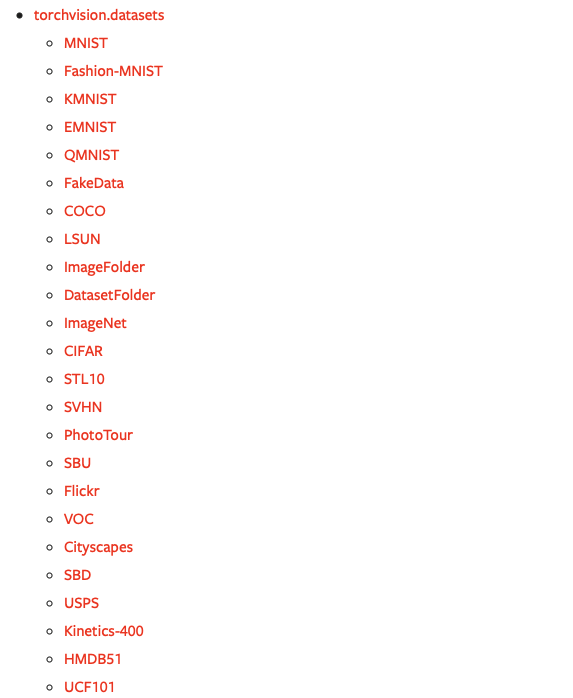

### GPU运算模块

- torch.cuda

### 分布式运算模块

- torch.distributed

### 其他模块

1. 持久化模型存储
2. 模型评估
3. 可视化仪表盘
4. 调试诊断

----

# 附录：

- 真心来说，Torch还是不如Tensorflow运算效率高。